In [8]:
import numpy as np
class Perceptron(object):
  """Perceptron classifier.
  Parameters
  ------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset.
  random_state : int
    Random number generator seed for random weight
    initialization.
  Attributes
  -----------
  w_ : 1d-array
    Weights after fitting.
  errors_ : list
    Number of misclassifications (updates) in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
      self.eta = eta
      self.n_iter = n_iter
      self.random_state = random_state
  def fit(self, X, y):
      """Fit training data.
      Parameters
      ----------
      X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
      y : array-like, shape = [n_examples]
        Target values.
      Returns
      -------
      self : object
      """
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01,
                            size=1 + X.shape[1])
      self.errors_ = []
      for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X, y):
              update = self.eta * (target - self.predict(xi))
              self.w_[1:] += update * xi
              self.w_[0] += update
              errors += int(update != 0.0)
          self.errors_.append(errors)
      return self
  def net_input(self, X):
           """Calculate net input"""
           return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
           """Return class label after unit step"""
           return np.where(self.net_input(X) >= 0.0, 1, -1)

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


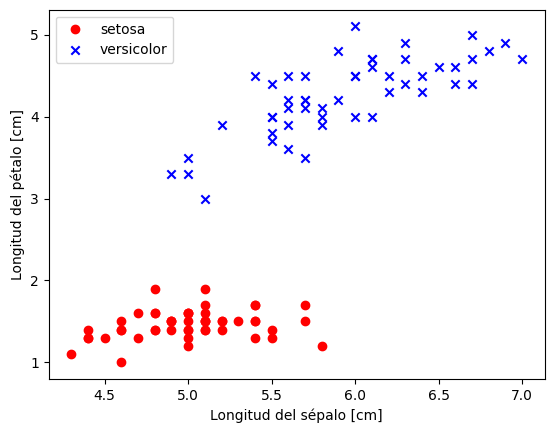

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir URL del dataset Iris
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Cargar el dataset
df = pd.read_csv(url, header=None, encoding='utf-8')

# Mostrar las últimas 5 filas para verificar la carga correcta
print(df.tail())

# Seleccionar solo las clases 'Iris-setosa' y 'Iris-versicolor'
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)  # Setosa = -1, Versicolor = 1

# Extraer características: longitud del sépalo (columna 0) y longitud del pétalo (columna 2)
X = df.iloc[0:100, [0, 2]].values

# Graficar los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

# Etiquetas de los ejes
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='upper left')

# Mostrar la gráfica
plt.show()


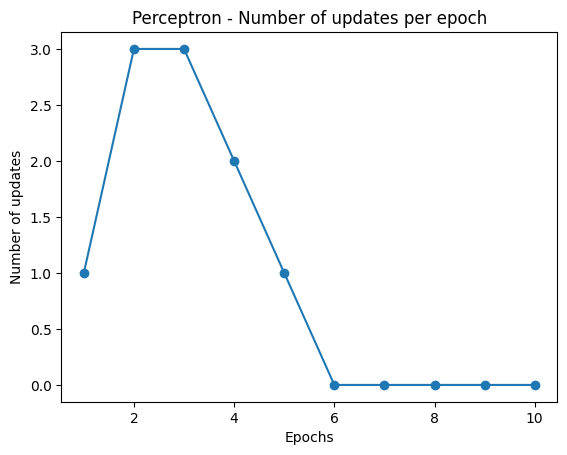

In [9]:
# Treinando o Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plotando os erros durante as épocas
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Number of updates per epoch')
plt.show()

In [ ]:
class AdalineGD(object):

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
    size=1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  def net_input(self, X):

      return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):

      return X
  def predict(self, X):

    return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

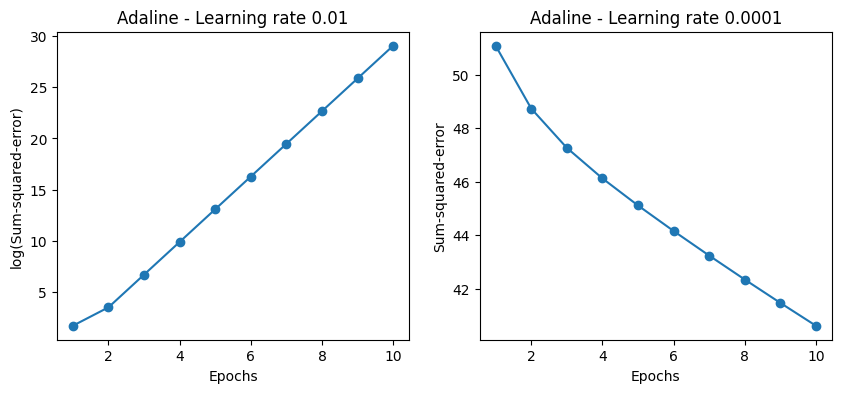

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Train Adaline with eta=0.01
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# Train Adaline with eta=0.0001
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# Show plots
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar os marcadores e o mapa de cores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Criar a grade de pontos para o contorno da superfície de decisão
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Fazer previsões para todos os pontos da grade
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Criar o contorno da superfície de decisão
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotar os exemplos de cada classe
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Classe {cl}',
                    edgecolor='black')


<ipython-input-8-d3bb128f00b0>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


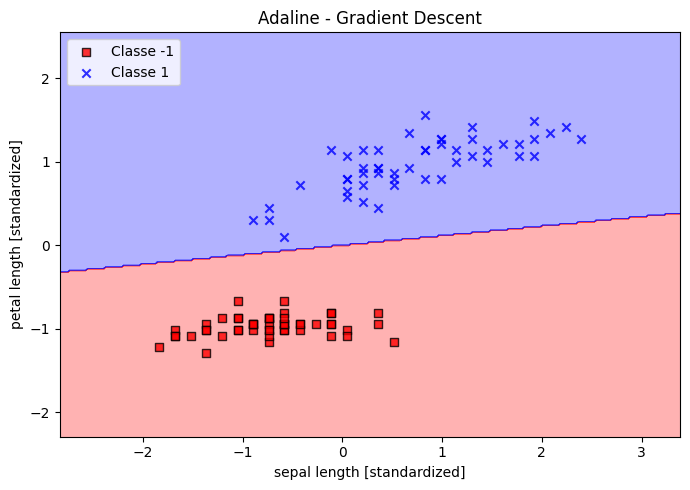

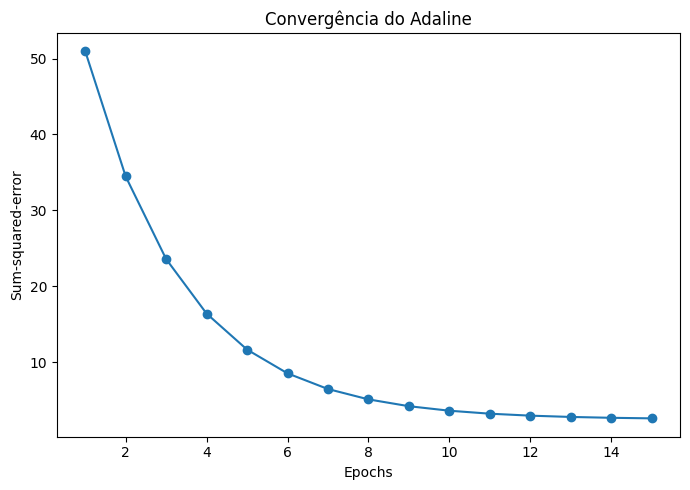

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Padronizar os dados
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Treinar AdalineGD com os dados padronizados
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

# Plotar regiões de decisão
plt.figure(figsize=(7, 5))
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plotar curva de erro quadrático
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Convergência do Adaline')
plt.tight_layout()
plt.show()


First steps with scikit-learn – training a perceptron

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Selecionar comprimento e largura da pétala
y = iris.target

print('Class labels:', np.unique(y))  # Ver quais classes existem
# Saída esperada: Class labels: [0 1 2]

# Dividir em treino e teste com 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Mostrar a distribuição das classes
print('Labels counts in y:', np.bincount(y))  # Frequência de cada classe
# Exemplo de saída: Labels counts in y: [50 50 50]


Class labels: [0 1 2]
Labels counts in y: [50 50 50]


In [2]:
print('Labels counts in y:', np.bincount(y_train))  # Frequência de cada classe


Labels counts in y: [35 35 35]


In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Use petal length and width
y = iris.target

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize and train the Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Make predictions
y_pred = ppn.predict(X_test_std)

# Evaluate performance
print('Misclassified examples:', (y_test != y_pred).sum())
print('Accuracy (using accuracy_score): %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy (using ppn.score): %.3f' % ppn.score(X_test_std, y_test))


Misclassified examples: 1
Accuracy (using accuracy_score): 0.978
Accuracy (using ppn.score): 0.978


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Exibindo outras métricas para classificação multiclasse
print('Precision: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.3f'    % recall_score(y_test, y_pred, average='macro'))
print('F1-score: %.3f'  % f1_score(y_test, y_pred, average='macro'))


Precision: 0.979
Recall: 0.978
F1-score: 0.978


In [ ]:
# 🧠 Multi-class Classification Metrics Explained (Precision, Recall, F1-Score)

In multi-class classification problems, we often use the following metrics to evaluate model performance:

- **Precision**: How many of the predicted labels are actually correct?
- **Recall**: How many of the actual labels were correctly identified?
- **F1-Score**: Harmonic mean of precision and recall.

We will manually compute these metrics using a simplified example to understand how they work.

---

## 📊 Example: True vs Predicted Labels

Suppose we have 3 classes (Setosa = 0, Versicolor = 1, Virginica = 2), and the model made the following predictions:

| True (y_test) | Predicted (y_pred) |
|---------------|--------------------|
| 0             | 0                  |
| 0             | 0                  |
| 0             | 1 ❌               |
| 1             | 1                  |
| 1             | 1                  |
| 1             | 2 ❌               |
| 2             | 2                  |
| 2             | 1 ❌               |
| 2             | 2                  |

---

## 🧮 Confusion Matrix

| Actual \ Predicted | 0 | 1 | 2 |
|--------------------|---|---|---|
| 0 (Setosa)         | 2 | 1 | 0 |
| 1 (Versicolor)     | 0 | 2 | 1 |
| 2 (Virginica)      | 0 | 1 | 2 |

---

## 📐 Metric Calculations
#  Precision = how many correct predictions out of all predictions for a specific class?
#  Recall= how many actual record of a class correctly predicted?

### Class 0 (Setosa):
- TP = 2, FP = 0, FN = 1
- **Precision** = 2 / (2 + 0) = 1.00  
- **Recall** = 2 / (2 + 1) = 0.67  
- **F1-score** = 2 * (1 * 0.67) / (1 + 0.67) ≈ 0.80  

### Class 1 (Versicolor):
- TP = 2, FP = 2, FN = 1
- **Precision** = 2 / (2 + 2) = 0.50  
- **Recall** = 2 / (2 + 1) = 0.67  
- **F1-score** = 2 * (0.50 * 0.67) / (0.50 + 0.67) ≈ 0.57  

### Class 2 (Virginica):
- TP = 2, FP = 1, FN = 1
- **Precision** = 2 / (2 + 1) = 0.67  
- **Recall** = 2 / (2 + 1) = 0.67  
- **F1-score** = 2 * (0.67 * 0.67) / (0.67 + 0.67) = 0.67  

---

## 📊 Macro Averages (Unweighted Mean of Classes)

- **Macro Precision** = (1.00 + 0.50 + 0.67) / 3 ≈ **0.723**
- **Macro Recall** = (0.67 + 0.67 + 0.67) / 3 = **0.67**
- **Macro F1-score** = (0.80 + 0.57 + 0.67) / 3 ≈ **0.68**

---

## 🧪 Computing with Scikit-learn

```python
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
print('Precision: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.3f'    % recall_score(y_test, y_pred, average='macro'))
print('F1-score: %.3f'  % f1_score(y_test, y_pred, average='macro'))


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Configurar marcadores y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar puntos de entrenamiento
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # Resaltar puntos de prueba
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')


/var/folders/pm/6lhltgwj1xj7p4ysn7j8tmhm0000gn/T/ipykernel_75617/2286332623.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


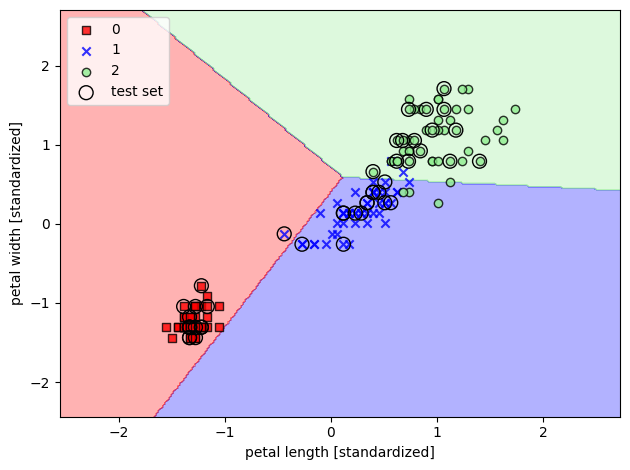

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/var/folders/pm/6lhltgwj1xj7p4ysn7j8tmhm0000gn/T/ipykernel_75617/2124243017.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(z)$')


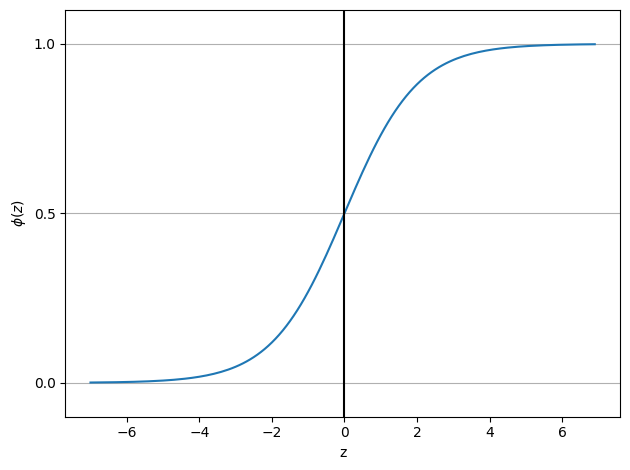

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função sigmoide
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Criando os valores de entrada e aplicando a função
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

# Criando o gráfico
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')  # Linha vertical em z = 0
plt.ylim(-0.1, 1.1)          # Limites do eixo y
plt.xlabel('z')
plt.ylabel('$\phi(z)$')

# Personalizando o eixo y
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()
